## Create the Feature Ranking Plot for each Method

In [1]:
import sys, os
sys.path.insert(0, '/home/monte.flora/python_packages/scikit-explain/')
sys.path.append('/home/monte.flora/python_packages/master/ml_workflow')
sys.path.append('/work/mflora/ROAD_SURFACE')
import skexplain
from os.path import join
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import joblib
import matplotlib.pyplot as plt
#from display_names import feature_colors, display_feature_names
from skexplain.common.importance_utils import to_skexplain_importance

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.io.io import load_xai_data
from src.io.display_names import feature_colors, display_feature_names

In [2]:
dataset = 'severe_wind'

In [3]:
explainer = skexplain.ExplainToolkit(seaborn_kws={'style' : 'dark'})

In [4]:
results, methods, name = load_xai_data(dataset, 'reduced')
names = [name]*len(methods)
data = results

Loading backward_singlepass...
Loading backward_multipass...
Loading forward_singlepass...
Loading forward_multipass...
Loading sage...
sage did not load!
Loading coefs...
Loading shap_sum...
Loading ale_variance...
Loading pd_variance...
Loading lime...


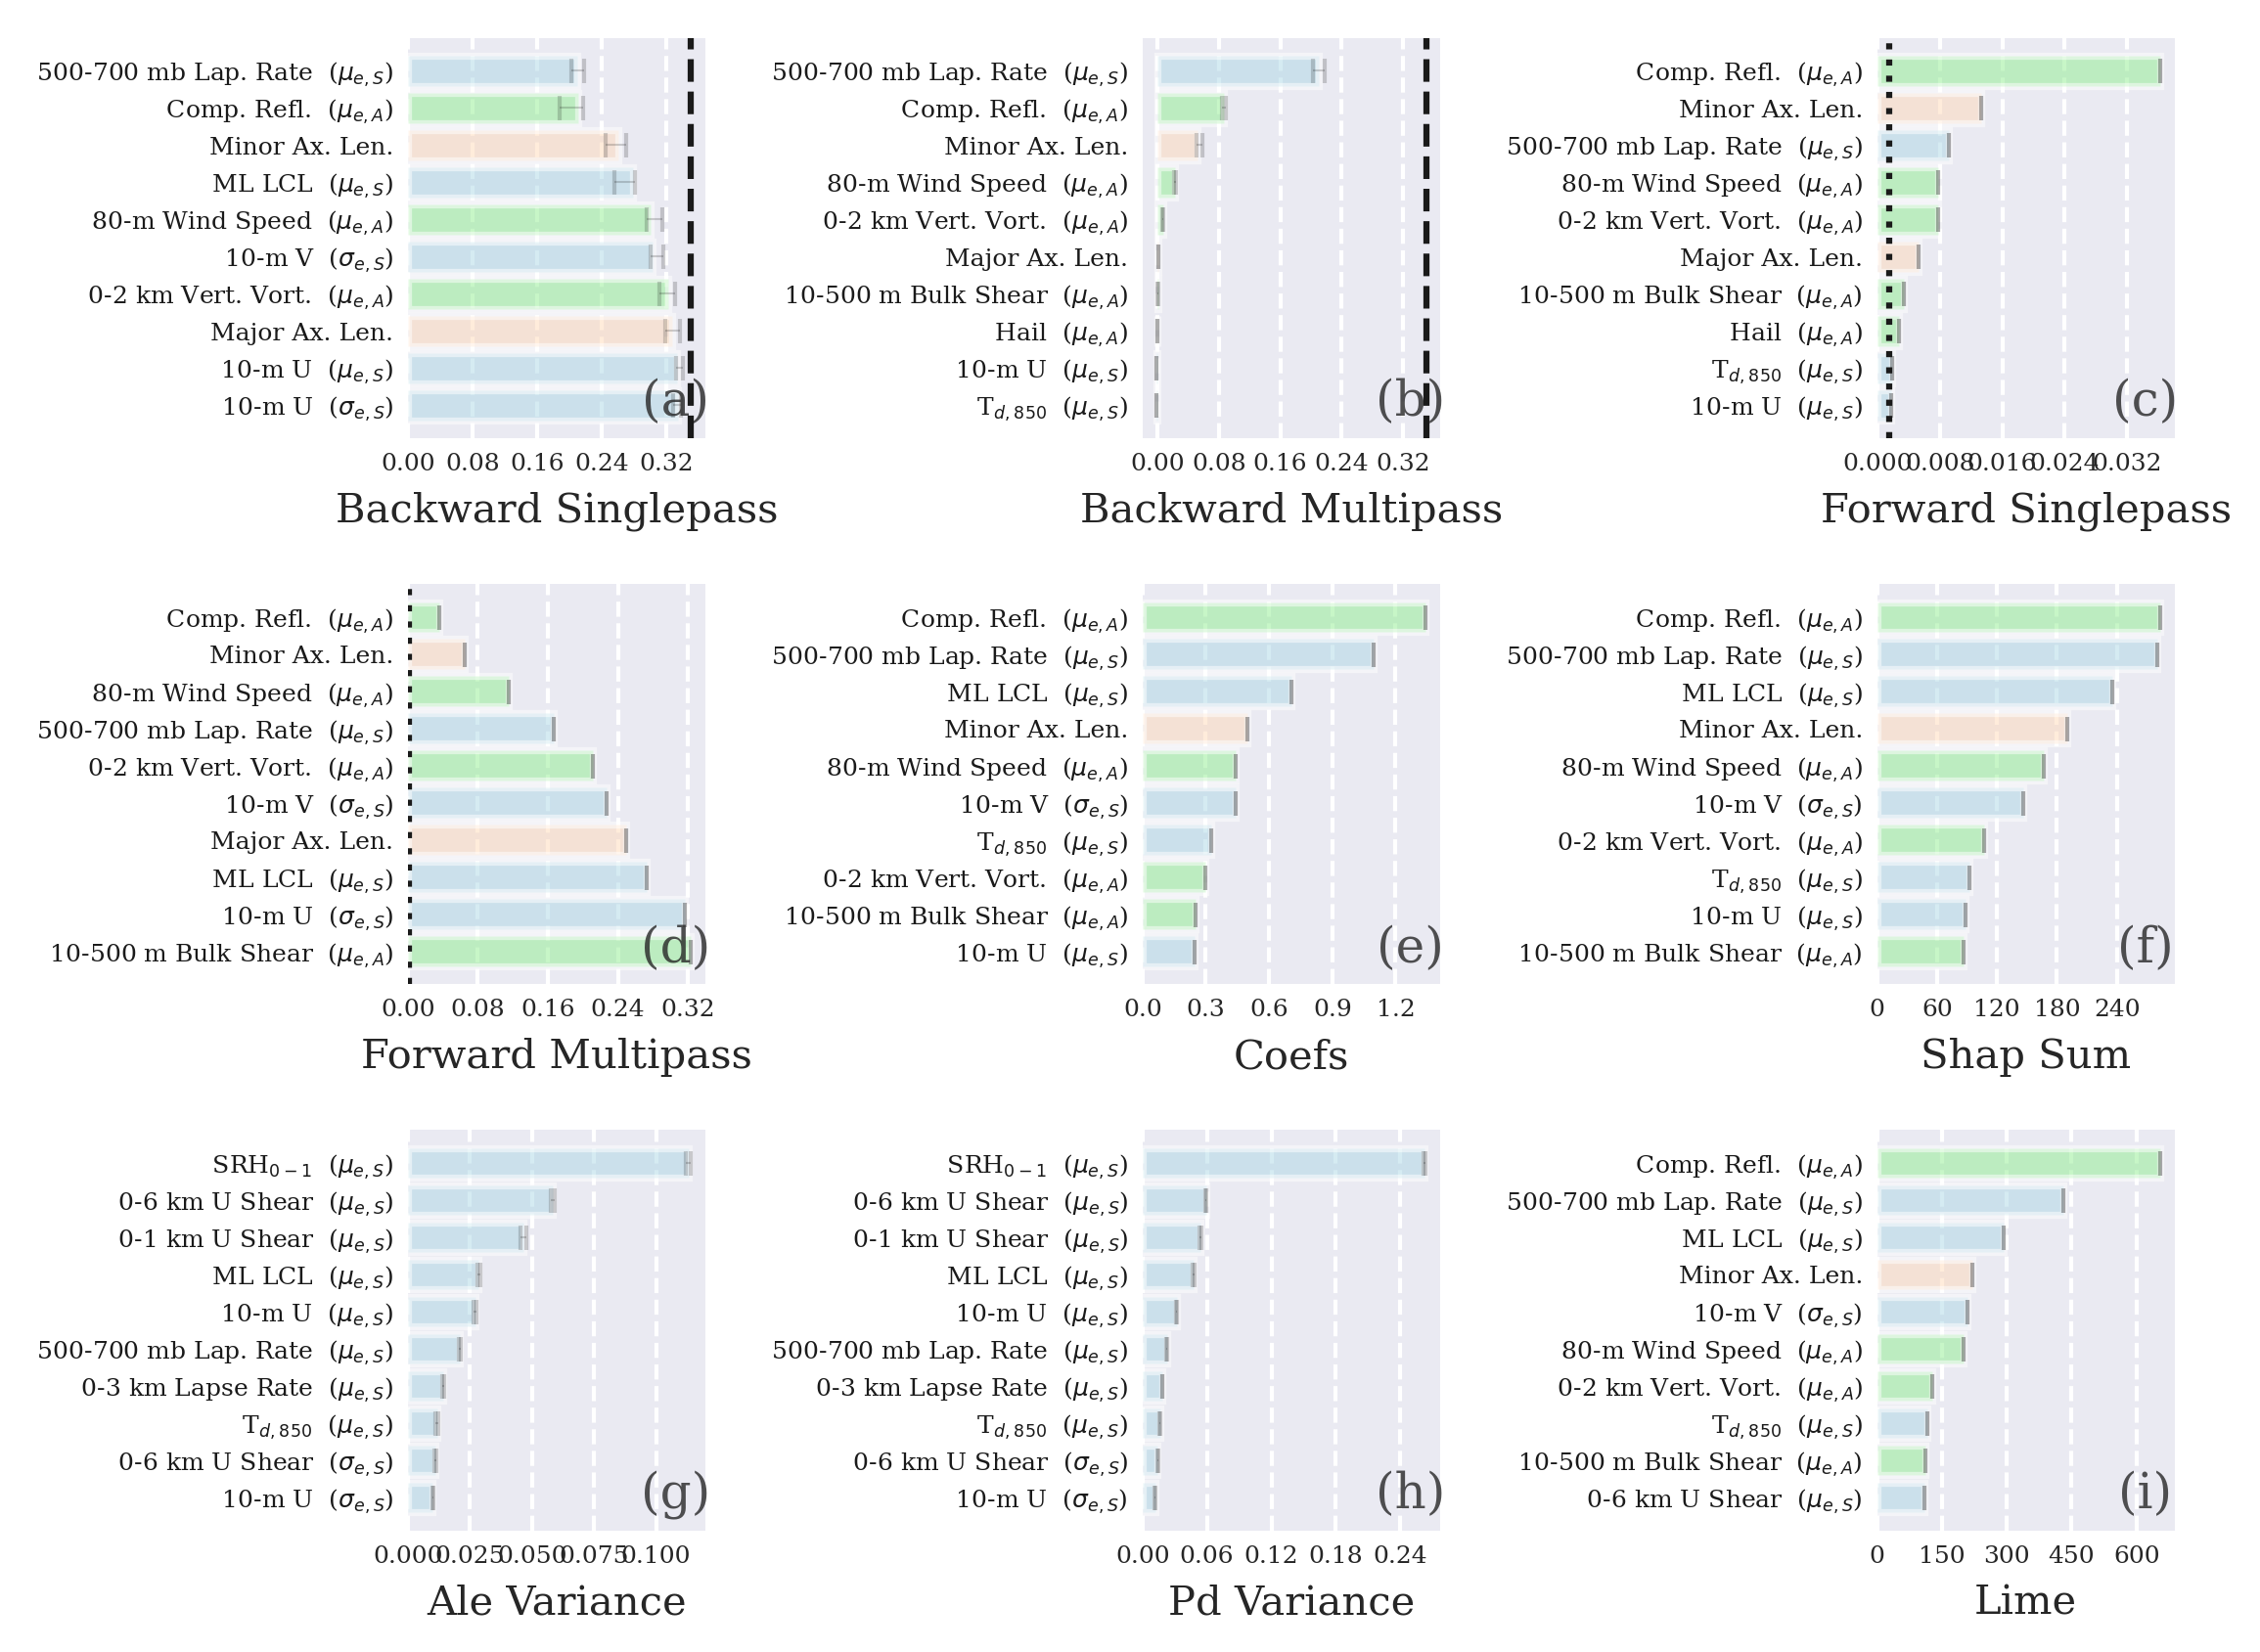

In [7]:
xlabels = [m.replace('_', ' ').title() for m in methods]


panels = [(m, n) for m, n in zip(methods, names)]
fig, axes = explainer.plot_importance(data=data, panels=panels, 
                                num_vars_to_plot=10, 
                                display_feature_names=display_feature_names,
                                feature_colors=feature_colors,
                                plot_correlated_features=False, 
                                n_columns=3,
                                xlabels=xlabels,
                                figsize=(8, 6), 
                                base_font_size= 12,
                                wspace=1.0, 
                                alphabet_fontsize=12, 
                                rho_threshold=0.6,
                                plot_reference_score=True,
                                plot_error=True, 
                               )
for ax in axes.flat:
    ax.xaxis.grid(ls='dashed')